Model Coefficients: [   119.45365644 -29099.8945458   22311.39940061]
Model Intercept: 48168.175502399914
Mean Squared Error: 3199122661.2103705
R^2 Score: 0.5268261607226541
Predicted Price for the new house: 333173.03355964494
Predicted Bedrooms: 1.92
Predicted Bathrooms: 1.92


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


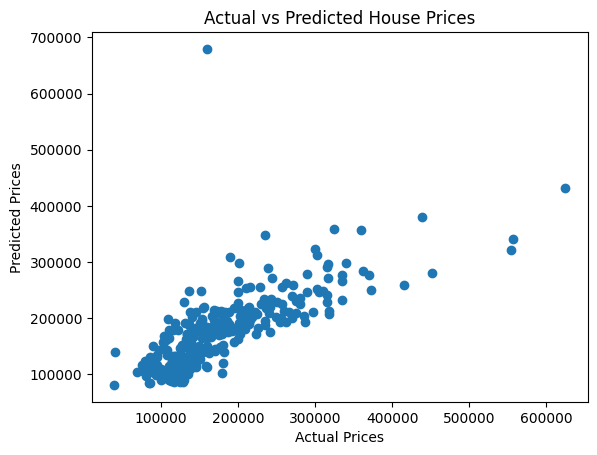

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the provided CSV file
file_path = '/content/train.csv'
df = pd.read_csv(file_path)

# Data Cleaning
# Extract relevant columns
df = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]

# Handle missing values
df = df.dropna()  # Drop rows with missing values

# Remove duplicates
df = df.drop_duplicates()

# Ensure correct data types
df['GrLivArea'] = df['GrLivArea'].astype(float)
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype(int)
df['FullBath'] = df['FullBath'].astype(int)
df['SalePrice'] = df['SalePrice'].astype(float)

# Features and target variable
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Predicting a new house price
new_house = np.array([[2800, 4, 3]])  # Example: 2800 sq. ft., 4 bedrooms, 3 bathrooms
predicted_price = model.predict(new_house)
print("Predicted Price for the new house:", predicted_price[0])

# Predict the number of bedrooms and bathrooms for given square footage and price
sq_ft = 3000  # Example square footage
price = 400000  # Example price

# Solving for bedrooms and bathrooms using the linear regression equation
coeff_bedrooms = model.coef_[1]
coeff_bathrooms = model.coef_[2]
intercept = model.intercept_
remaining_price = price - (model.coef_[0] * sq_ft) - intercept

# Assuming equal contribution of bedrooms and bathrooms
avg_coeff = (coeff_bedrooms + coeff_bathrooms) / 2
predicted_bedrooms = remaining_price / avg_coeff
predicted_bathrooms = remaining_price / avg_coeff

print(f"Predicted Bedrooms: {predicted_bedrooms:.2f}")
print(f"Predicted Bathrooms: {predicted_bathrooms:.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()